## Pneumonia Detection and classification from Chest X-Ray

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3
# CHANNELS = 1

#### Img training set generator

In [3]:
# ImageDataGenerator is working as basic python generator function
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/chest_xray/train',
        # target_size=(-1, IMAGE_SIZE,IMAGE_SIZE, 1),
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 5216 images belonging to 2 classes.


In [4]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

#### available classes under training set

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['NORMAL', 'PNEUMONIA']

In [6]:
count=0
for image_batch, label_batch in train_generator:
    # print(label_batch)
    print(image_batch[0])
    break

[[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  ...
  [5.6470591e-01 5.6470591e-01 5.6470591e-01]
  [5.6499237e-01 5.6499237e-01 5.6499237e-01]
  [5.6599158e-01 5.6599158e-01 5.6599158e-01]]

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  ...
  [5.7177228e-01 5.7177228e-01 5.7177228e-01]
  [5.7266027e-01 5.7266027e-01 5.7266027e-01]
  [5.7315993e-01 5.7315993e-01 5.7315993e-01]]

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  ...
  [5.7605034e-01 5.7605034e-01 5.7605034e-01]
  [5.7670850e-01 5.7670850e-01 5.7670850e-01]
  [5.7820737e-01 5.7820737e-01 5.7820737e-01]]

 ...

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00]
  ..

#### Img validation set generator

In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/chest_xray/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 16 images belonging to 2 classes.


#### Img test set generator

In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/chest_xray/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 624 images belonging to 2 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.05936641 0.05936641 0.05936641]
  [0.12563586 0.12563586 0.12563586]
  [0.14785434 0.14785434 0.14785434]
  ...
  [0.50912416 0.50912416 0.50912416]
  [0.5123446  0.5123446  0.5123446 ]
  [0.51556504 0.51556504 0.51556504]]

 [[0.05468218 0.05468218 0.05468218]
  [0.12065888 0.12065888 0.12065888]
  [0.14639053 0.14639053 0.14639053]
  ...
  [0.49256057 0.49256057 0.49256057]
  [0.49021846 0.49021846 0.49021846]
  [0.48787636 0.48787636 0.48787636]]

 [[0.04999796 0.04999796 0.04999796]
  [0.1156819  0.1156819  0.1156819 ]
  [0.1449267  0.1449267  0.1449267 ]
  ...
  [0.49564916 0.49564916 0.49564916]
  [0.49652746 0.49652746 0.49652746]
  [0.49740574 0.49740574 0.49740574]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


### Build CNN

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size =(3,3), strides=1, padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64, kernel_size =(3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(64, kernel_size =(3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Conv2D(128, kernel_size =(3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                        

##### when our training dataset is discrete we've to use sparse_categorical_crossentropy as cost funct but when the training dataset is one-hot coded we've to use categorical_crossentropy

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #
    metrics=['accuracy']
)

### Training Model

In [14]:
5216/32 #train_set ratio per batch

163.0

In [15]:
16/32 #validation_set ratio per batch

0.5

In [16]:
624/32 #test_set ratio per batch

19.5

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=163,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=624, #test_set size
    verbose=1,
    epochs=20, 
)

Epoch 1/20
163/163 [==============================] - 891s 5s/step - loss: 0.6072 - accuracy: 0.9220 - val_loss: 83.4262 - val_accuracy: 0.5000
Epoch 2/20
163/163 [==============================] - 784s 5s/step - loss: 0.1103 - accuracy: 0.9620
Epoch 3/20
163/163 [==============================] - 779s 5s/step - loss: 0.0824 - accuracy: 0.9732
Epoch 4/20
163/163 [==============================] - 778s 5s/step - loss: 0.0649 - accuracy: 0.9799
Epoch 5/20
163/163 [==============================] - 790s 5s/step - loss: 0.0709 - accuracy: 0.9745
Epoch 6/20
163/163 [==============================] - 789s 5s/step - loss: 0.0653 - accuracy: 0.9760
Epoch 7/20
163/163 [==============================] - 789s 5s/step - loss: 0.0589 - accuracy: 0.9799
Epoch 8/20
163/163 [==============================] - 792s 5s/step - loss: 0.0517 - accuracy: 0.9824
Epoch 9/20
163/163 [==============================] - 792s 5s/step - loss: 0.0570 - accuracy: 0.9801
Epoch 10/20
163/163 [===========================

In [18]:
scores = model.evaluate(test_generator)

20/20 [==============================] - 63s 3s/step - loss: 0.5161 - accuracy: 0.8189


In [19]:
scores #Scores is just a list containing loss and accuracy value

[0.5160620212554932, 0.8189102411270142]

#### Plotting the Accuracy and Loss Curves

In [20]:
history

In [21]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 163}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
type(history.history['loss'])

list

In [24]:
len(history.history['loss'])

20

In [25]:
history.history['loss'][:5]

[0.6071671843528748,
 0.11034014075994492,
 0.08237406611442566,
 0.06487800925970078,
 0.0709424838423729]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
val_acc

[0.5]

In [28]:
acc

[0.9219708442687988,
 0.9620398879051208,
 0.9731594920158386,
 0.9798696041107178,
 0.9745015501976013,
 0.9760352969169617,
 0.9798696041107178,
 0.9823619723320007,
 0.9800613522529602,
 0.9796779155731201,
 0.985237717628479,
 0.9854294657707214,
 0.9869632124900818,
 0.985237717628479,
 0.9827454090118408,
 0.9831288456916809,
 0.9867714643478394,
 0.9804447889328003,
 0.985237717628479,
 0.9850460290908813]

In [29]:
'''EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
'''

"EPOCHS = 20\n\nplt.figure(figsize=(8, 8))\nplt.subplot(1, 2, 1)\nplt.plot(range(EPOCHS), acc, label='Training Accuracy')\nplt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')\nplt.legend(loc='lower right')\nplt.title('Training and Validation Accuracy')\n\nplt.subplot(1, 2, 2)\nplt.plot(range(EPOCHS), loss, label='Training Loss')\nplt.plot(range(EPOCHS), val_loss, label='Validation Loss')\nplt.legend(loc='upper right')\nplt.title('Training and Validation Loss')\nplt.show()\n"

In [30]:
test_accuracy = model.evaluate(test_generator, steps=624)
train_accuracy = model.evaluate(test_generator, steps=163)

print("The testing accuracy is :", test_accuracy[1]*100, "%")
print("The training accuracy is :", train_accuracy[1]*100, "%")


163/163 [==============================] - 45s 260ms/step - loss: 0.5076 - accuracy: 0.8333
The testing accuracy is : 84.61538553237915 %
The training accuracy is : 83.33333134651184 %


### Run prediction on a sample image

first image to predict
actual label: NORMAL
predicted label: NORMAL


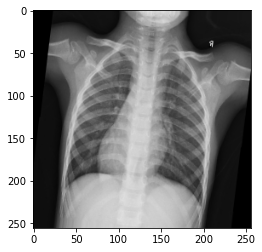

In [31]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    # print(image_batch)
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [32]:
def predict_(model, img):
    # Ensure image has 3 channels (convert grayscale to RGB)
    if img.shape[-1] == 1:  # Check if the image is grayscale
        img = tf.image.grayscale_to_rgb(img)  # Convert to RGB
        
    img_array = tf.keras.preprocessing.image.img_to_array(img) # img[i]
    # print(img_array)
    img_array = tf.expand_dims(img_array, 0)
    # print("#"*25)
    
    # print(img_array)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

#### Now run inference on few sample images

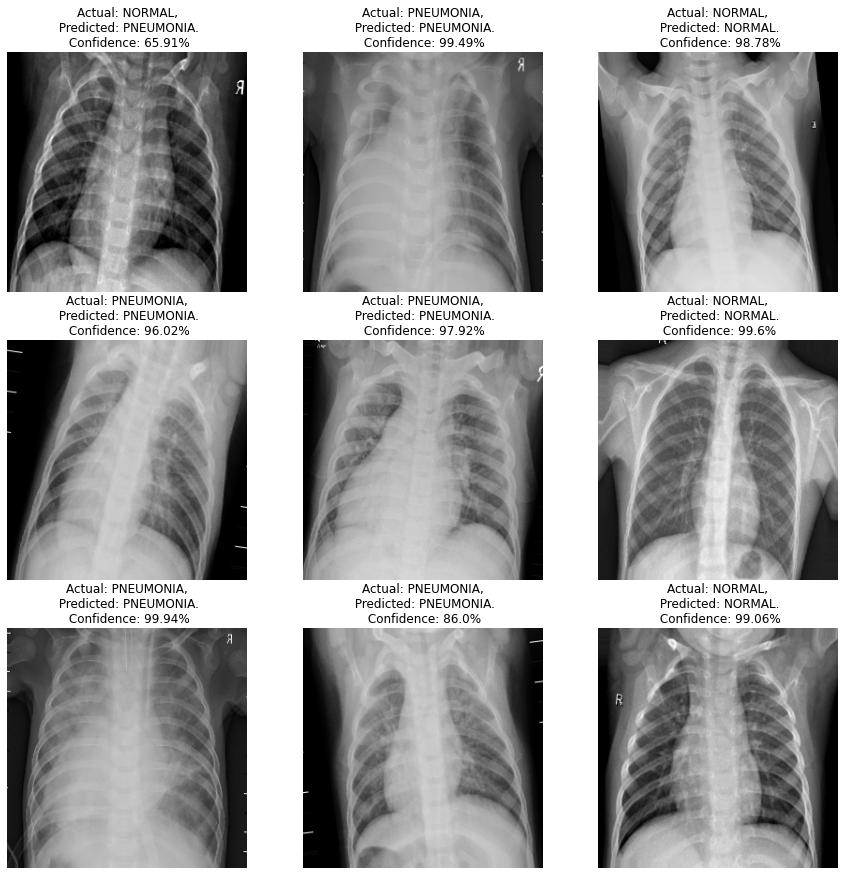

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        
        # Ensure images are displayed in RGB format
        img = images[i]
        if img.shape[-1] == 1:  # Convert grayscale to RGB for display
            img = tf.image.grayscale_to_rgb(img)
        plt.imshow(img)
        
        predicted_class, confidence = predict_(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

In [34]:
# below one is getting model's next version
# go to paste dir n return it content as list + add 0 to list then converted elt into int, then pick the maximum one elt of the list.
model_version = max(int(i) for i in os.listdir("./model") + [0]) + 1 # used to save our model in #t version
model.save(f"./model/{model_version}.h5")
# model.save("../pneumonia.h5")